# Lab1: Exploring cell types in human and mouse brains

### The brain has thousands of different types of cells. How do we even begin to tease them apart?

We can define neurons by their <b>gene expression patterns</b>, <b>electrophysiology features</b>, and <b>structure</b>. Here, we'll use those three features to compare and contrast cell types in humans and mice.

This notebook will help us investigate specific features in the electrophysiology dataset from the Allen Brain Atlas. See <b>Technical Notes</b> at the end of this notebook for more information about working with the AllenSDK. This notebook is designed to be run after completing <a href="https://ajuavinett.github.io/CellTypesLesson/instructions">this first activity</a>.

### Table of Contents
1. [Step 1. Importing Allen Cell Types Data](#one)
2. [Step 2. Plotting electrophysiology data](#two)
3. [Step 3. Plotting the morphology of the cell](#three)
4. [Step 4. Analyze computed metrics](#four)
5. [Step 5. Comparing human to mouse cells](#five)
<hr>

## Step 1. Learn about the dataset through a single experiment

1. Go to http://celltypes.brain-map.org/. Read through “About Electrophysiology” and “About Morphology”, and answer **Q1** and **Q2** in the Assignment.<br><br>

2. Scroll down to “Download Single Cell Data and Models” and the section “Morphology and Electrophysiology” and click on [Electrophysiology Page](http://celltypes.brain-map.org/experiment/electrophysiology/474626527). This page shows us all of the electrophysiology data for one sample cell that they have recorded from.<br><br>

3. On the top, you’ll see a Mouse Line, Brain Area, and Layer where this cell comes from. The Mouse Line tells us the Cre-driver line that was used — in other words, the cells that they targeted had that gene, and therefore they also expressed Cre-recombinase. Go to https://www.ncbi.nlm.nih.gov/gene/and search for the name of this gene (without -Cre) to answer **Q3**.<br><br>

4. Click through the stimulus sweeps (the colored boxes) to find the first one that elicited an action potential. Use this to answer **Q4**.
    - _Note_: You should notice that this value is either very close or identical to the rheobase of the cell, as reported on the table on the top. As a reminder, the rheobase is defined as the minimum current needed to elicit an action potential. When the current is below the rheobase, an action potential will never occur regardless of how long the stimulation is.<br><br>
    
5. Click through to a stimulus sweep with a higher current injection. Does the cell adapt to the stimulus? In other words, does the space between spikes increase? Is there a metric here that would help quantify this? Answer **Q5**.<br><br>

6. Use the dropdown menu on the left to change the stimulus type to “Short square.” Look at how the current injection trace changes – now, it’s a shorter pulse. Note the minimum current needed to elicit an action potential at this stimulus, and answer **Q6**.

<hr>

... as you can probably appreciate at this point, pulling all of this data off of the website manually is rather tedious. If we work directly with the dataset, we can get all of these metrics _and more_. So, let's do that.

<a id="two"></a>
## Step 2. Importing Allen Cell Types data
First, we'll `import` the CellTypesCache module. This module provides tools to allow us to get information from the cell types database. We're giving it a **manifest** filename as well. CellTypesCache will create this manifest file, which contains metadata about the cache. If you want, you can look under cell_types in your Jupyter directory, and take a look at the file.

<div class="alert alert-success"><b>Task</b>: The cell below will grab the data (in the form of a Neuroscience Without Borders, NWB, file) for the same experiment you just looked at on the website. All you need to do is run the cell. This might take a minute or two. You should wait until the circle in the upper right is not filled to continue.</div>

In [1]:
#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#Initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

# Get the electrophysiology (ephys) data for that cell
data = ctc.get_ephys_data(474626527)

# Pull out one sweep with some spikes
sweep_data = data.get_sweep(28) 
print('Data retrieved')

Data retrieved


/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/opt/conda/lib/python3.6/site-packages/allensdk/core/nwb_data_set.py:135: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  exp_idx_start = 

<a id="three"></a>
## Step 3. Plotting electrophysiology data
Now that you've pulled down some data, chosen a cell, and chosen a sweep number, let's plot the raw data.

First, let's import and rename a few packages that we need to plot our data.

<div class="alert alert-success">
    <b>Task</b>: Just like you did in the introductory lesson, import the <a href="https://www.numpy.org/">numpy</a> toolbox nicknamed as <code>np</code>. Add a <code>print</code> message at the end that says "Packages imported" so that you know the code ran.</div>

<a id="four"></a>
## Step 4. Analyze computed metrics

The Cell Types Database contains a set of features that have already been computed, which could serve as good starting points for analysis. We can query the database to get these features. Let's first see which features are available.

In [5]:
# Import another useful package, called pandas
import pandas as pd

# Download all electrophysiology features for all cells
ephys_features = ctc.get_ephys_features()
ef_df = pd.DataFrame(ephys_features)

print("Ephys features available for %d cells:" % len(ef_df))
print(ef_df.columns)

Ephys features available for 2333 cells:
Index(['adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope',
       'fast_trough_t_long_square', 'fast_trough_t_ramp',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_ramp', 'fast_trough_v_short_square', 'has_burst',
       'has_delay', 'has_pause', 'id', 'input_resistance_mohm', 'latency',
       'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square',
       'peak_v_long_square', 'peak_v_ramp', 'peak_v_short_square',
       'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 'seal_gohm',
       'slow_trough_t_long_square', 'slow_trough_t_ramp',
       'slow_trough_t_short_square', 'slow_trough_v_long_square',
       'slow_trough_v_ramp', 'slow_trough_v_short_square', 'specimen_id',
       'tau', 'threshold_i_long_square', 'threshold_i_ramp',
       'threshold_i_short_square', 'threshold_t_long_square',
       'threshold_t_ramp', 'threshold_t_short_square',
       'threshold_v_long_squar

This is a lot of possible features. Let's first look at the speed of the trough, and the ratio between the upstroke and downstroke of the action potential.
![](https://github.com/ajuavinett/CellTypesLesson/blob/master/docs/ap_features.png?raw=true)
<div style="background: #F3D48D; border-radius: 3px; padding: 10px;">
<b>Action potential fast trough (fast_trough_v_long_square)</b>: Minimum value of the membrane potential in the interval lasting 5 ms after the peak.

<b>Upstroke/downstroke ratio (upstroke_downstroke_ratio_long_square)</b>: The ratio between the absolute values of the action potential peak upstroke and the action potential peak downstroke.</div> 

Above, we created a pandas dataframe of all of these features. Here, we'll assign the columns we're interested to two different variables. These variables now contain all of the datapoints we're interested in.

In [6]:
fast_trough = ef_df['fast_trough_v_long_square']
upstroke_downstroke = ef_df['upstroke_downstroke_ratio_long_square']

<div class="alert alert-success">
<b>Task:</b> Create a scatterplot that plots the fast trough (x axis) versus the upstroke-downstroke ratio (y axis). Label your axes accordingly. You'll also need this code for <b>Q7</b> on the assignment.

<b>Hint</b>: Make sure you have the toolboxes you need!</div>

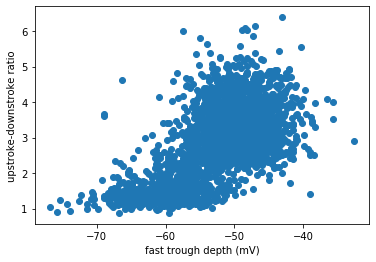

In [7]:
# Your scatterplot here

It looks like there may be roughly two clusters in the data above. Maybe they relate to whether the cells are presumably excitatory (spiny) cells or inhibitory (aspiny) cells. Let's query the API and split up the two sets to see.

<div class="alert alert-success">
<b>Task:</b> Run the cell below.</div>

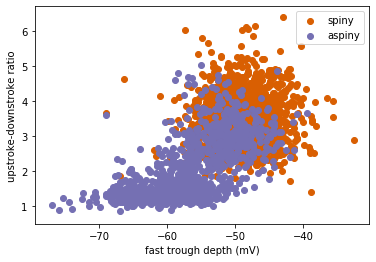

In [8]:
cells = ctc.get_cells()

# we want to add dendrite type as a column to the ephys. features dataframe
# first build an index on cell specimen ID, then create array of dendrite types
cell_index = { c['id']: c for c in cells }

dendrite_types = []
list_index = []

for cid in ef_df['specimen_id']:
    if cid in cell_index:
        dendrite_types.append(cell_index[cid]['dendrite_type'])
        list_index.append(ef_df.index[ef_df['specimen_id']==cid].tolist())
        
index_list = []
for sublist in list_index:
    for item in sublist:
        index_list.append(item)
        
# now add the new column
ef_df['dendrite_type'] = pd.Series(dendrite_types, index=index_list)

for d_type, color in [ ["spiny", "#d95f02"], ["aspiny", "#7570b3"] ]:
    df = ef_df[ef_df['dendrite_type'] == d_type]
    plt.scatter(df['fast_trough_v_long_square'], 
                df['upstroke_downstroke_ratio_long_square'], 
                color=color, label=d_type)
    plt.ylabel("upstroke-downstroke ratio")
    plt.xlabel("fast trough depth (mV)")
    plt.legend(loc='best')
    
plt.show()

Looks like these two clusters do partially relate to the dendritic type. Cells with spiny dendrites (which are typically excitatory cells) have a big ratio of upstroke:downstroke, and a more shallow trough (less negative). Cells with aspiny dendrites (typically inhibitory cells) are a little bit more varied. But </i>only</i> aspiny cells have a low upstroke:downstroke ratio and a deeper trough (more negative).

Let's take a closer look at the action potentials of these cells to see what these metrics actually mean for the action potential waveform by choosing one of the cells with the highest upstroke:downstroke ratio.

In [46]:
ef_df_upstroke_sorted = ef_df.sort_values('upstroke_downstroke_ratio_long_square',ascending=True)
top_cell = ef_df_upstroke_sorted.iloc[0]
print(top_cell['specimen_id'])
print(top_cell['upstroke_downstroke_ratio_long_square'])

485048967
0.8627261095128709


Now we can take a closer look at the action potential for that cell by grabbing its electrophysiology data, just like we did above. Let's find a good sweep that will show us some nice action potentials. The next cell of code will look for sweep numbers with a Long Square stimulus of at least 100 pA. It'll print some sweep IDs.

In [47]:
upstroke_data = ctc.get_ephys_data(top_cell['specimen_id'])
sweepIDs = upstroke_data.get_sweep_numbers()
sweepNum = len(sweepIDs)
for i in range(1,sweepNum):
    sweepMeta = upstroke_data.get_sweep_metadata(sweepIDs[i])
    if sweepMeta['aibs_stimulus_name'] == 'Long Square':
        if sweepMeta['aibs_stimulus_amplitude_pa'] >100:
            # print(sweepMeta)
            print(sweepIDs[i])

2020-04-17 16:13:36,592 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/496605759


40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
58
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77


<div class="alert alert-success"><b>Task</b>: Enter one of these sweep IDs in the next cell where it says "upstroke_sweep_id".</div>

In [37]:
import numpy as np

# choose a sweep number to plot
upstroke_sweep_id = 40
upstroke_sweep = upstroke_data.get_sweep(upstroke_sweep_id) 

index_range = upstroke_sweep["index_range"]
voltage = upstroke_sweep["response"][0:index_range[1]+1] * 1e3 # in V

sampling_rate = upstroke_sweep["sampling_rate"] # in Hz
time_stamps = (np.arange(0, len(v)) * (1.0 / sampling_rate))

And now let's plot our sweep. You may need to change some values in the plotting script to actually zoom in on the action potential, or change the sweep number to one where you can see an action potential.

<div class="alert alert-success"><b>Task</b>: Modify the plotting script so that you can actually see the shape of the action potential.</div>

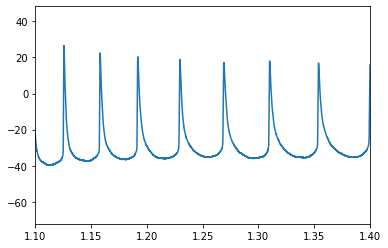

In [38]:
plt.plot(time_stamps,voltage)
plt.xlim([1.1,1.4])
plt.show()

Let's do the same thing for a cell with a low upstroke ratio and compare. Similiar to above, zoom in on the x axis so that you can actually see the shape of the waveform. Do this for **Q8** on the assignment.

As you'll hopefully see, even that one metric, upstroke:downstroke ratio, means the shape of the action potential is dramatically different. The other metric above, size of the trough, is highly correlated with upstroke:downstroke. You can see that by comparing the two cells here. Cells with high upstroke:downstroke tend to have less negative troughs (undershoots) after the action potential.

<a id="five"></a>

## Step 5. Comparing human to mouse cells
Let's get out of the action potential weeds a bit. What if we want to know a big picture thing, such as <b>are human cells different than mouse cells?</b>
    
We can make similar plots to above but subselected for human and mouse cells. First, let's get an idea of how many cells of each type are here.

In [ ]:
from allensdk.api.queries.cell_types_api import CellTypesApi

# download all cells
cells = ctc.get_cells()
print("Total cells: %d" % len(cells))
# mouse cells
cells = ctc.get_cells(species=[CellTypesApi.MOUSE])
print("Mouse cells: %d" % len(cells))
# human cells
cells = ctc.get_cells(species=[CellTypesApi.HUMAN])
print("Human cells: %d" % len(cells))

Let's now get all of the electrophysiology data for the mouse and human cells, separately.

In [ ]:
# make a dataframe out of ephys features
ephys_features_df = pd.DataFrame.from_records(ephys_features)
ephys_features_df.head(1)

# grab mouse data and merge with dataframe
mouse_df = pd.DataFrame(ctc.get_cells(species=[CellTypesApi.MOUSE]))
mouse_ephys_df = pd.merge(mouse_df,ephys_features_df,left_on='id',right_on='specimen_id',how='left')

# grab human data and merge with dataframe
human_df = pd.DataFrame(ctc.get_cells(species=[CellTypesApi.HUMAN]))
human_ephys_df = pd.merge(human_df,ephys_features_df,left_on='id',right_on='specimen_id',how='left')

print('Dataframes created.')

Let's look at the first five rows of our mouse and human datasets here.

<div class="alert alert-success"><b>Task</b>: Show the first few rows of the table by using brackets after the variable name. Look above to see which variable your merged dataframe is saved as (hint: it's the variable assigned in the line where <code>pd.merge</code> is used). Then, you'll you want to enter <code>variable_name[1:5]</code>. Do this for the mouse data in the first cell below, and human data in the second. Scroll to the right within the table to see all of the available parameters for the cell.</div>

Let's start by plotting the resting membrane potential for all of our human cells vs all of our mouse cells.

In [ ]:
plt.figure()

# Change your parameter below. Make sure this matches the names in the list you generated above!
parameter = 'vrest'

# Below it is set to plot resting membrane potential 'vrest'.
# That's where you can change what is being plotted.
# Make sure you change it for both the mouse and human plot!
plt.hist([mouse_ephys_df[parameter],human_ephys_df[parameter]],color=[(0, .5,.5, 0.5),(0, 0, 1, 0.5)])

# this is where you should change the label:
plt.xlabel('Resting Membrane Potential (mV)')
plt.ylabel('Number of Cells')
plt.legend(['mouse','human'])
plt.show()

<div class="alert alert-success"> <b>Task</b>: Choose a different parameter to compare between human and mouse cells, and rerun the plot above. Use the documentation below to get the exact name of the parameter (in parentheses), and change the x label axis so that we know what you're plotting.

Save your figure by right clicking on the image above. You'll need to submit this with the assignment.</div>

Here are a few additional metrics you might consider comparing:

<div style="background: #F3D48D; border-radius: 3px; padding: 10px;">
    <b>Action potential fast trough (fast_trough_v_long_square)</b>: Minimum value of the membrane potential in the interval lasting 5 ms after the peak.
    <b>Upstroke/downstroke ratio (upstroke_downstroke_ratio_long_square)</b>: The ratio between the absolute values of the action potential peak upstroke and the action potential peak downstroke.
    <b>Adapation ratio (adaptation)</b>: The rate at which firing speeds up or slows down during a stimulus<br>
    <b>Average ISI (avg_isi)</b>: The mean value of all interspike intervals in a sweep.<br>
    <b>Voltage of after-hyperpolarization (trough_v_short_square)</b>: minimum value of the membrane potential during the after-hyperpolarization</div>
    

### Subselect for spiny or aspiny cells.
Final step for today! The histogram above is for <i>all cell types</i>, which is a really hetergenous bunch.

What happens if we subselect our human and mouse cells to be just spiny, or just aspiny? Will those types be more different in humans and mice?

<div class="alert alert-success"><b>Task</b>: Decide whether you want to look at spiny or aspiny cells by setting cell_type to either 'spiny' or 'aspiny' below. The value of your variable needs to be a <b>string</b> -- in other words, it should have quotes around it.</div>

In [ ]:
cell_type =

human = human_ephys_df[human_ephys_df['dendrite_type']== cell_type]
mouse = mouse_ephys_df[mouse_ephys_df['dendrite_type']== cell_type]
print(['Number of human' + cell_type + 'cells: %d' % len(human)])
print(['Number of mouse' + cell_type + 'cells: %d' % len(mouse))

# Change your parameter below.
parameter = 'vrest'

plt.hist([mouse[parameter],human[parameter]],color=[(0, .5,.5, 0.5),(0, 0, 1, 0.5)])
plt.xlabel('Resting Membrane Potential (mV)')
plt.ylabel('Number of Cells')
plt.legend(['mouse','human'])

#cells_concat = pd.concat([mouse[parameter],human[parameter]],axis=1)
#cells_concat.columns = ['mouse','human']
#cells_concat.boxplot()
#plt.ylabel('Resting Membrane Potential (mv)')

plt.show()

<div class="alert alert-success"><b>Task</b>: It's a little hard to see differences here, so let's plot it as a boxplot. <b>Comment</b> out the lines for the histogram (add a <code>#</code> and <b><i>uncomment</b></i> the four lines below. Re-run the code to get a boxplot of the data.

Change the metric here to whatever metric you created and saved a histogram for above. Save your image when you're done.

Submit both of your images along with your answers to the worksheet.
</div>

In [ ]:
from IPython.display import HTML
print('Nice work!')
HTML('<img src="https://media.giphy.com/media/xUOwGhOrYP0jP6iAy4/giphy.gif">')

-----------

#### Technical notes & credits

This notebook demonstrates most of the features of the AllenSDK that help manipulate data in the Cell Types Database.  The main entry point will be through the `CellTypesCache` class. `CellTypesCache` is responsible for downloading Cell Types Database data to a standard directory structure on your hard drive.  If you use this class, you will not have to keep track of where your data lives, other than a root directory.

Much more information can be found in the <a href="http://help.brain-map.org/download/attachments/8323525/CellTypes_Ephys_Overview.pdf">Allen Brain Atlas whitepaper</a> as well as in their <a href="http://alleninstitute.github.io/AllenSDK/cell_types.html">GitHub documentation</a>.

This file modified from <a href='https://alleninstitute.github.io/AllenSDK/_static/examples/nb/cell_types.html'>this</a> notebook.

In case you're curious, <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html ">here's documentation</a> for plotting pandas series (which we do quite a bit above). You can always Google questions you have!)